### Importing Libraries and modules

In [24]:
%load_ext autoreload
%autoreload 2
import os
import sys
import pandas as pd
# from telethon import TelegramClient, events
# sys.path.append(os.path.abspath('../src'))
# sys.path.append(os.path.abspath('../Scripts'))
# from Preprocess import Preprocess
# from data_loader import DataLoad
# from plot import Visualization
# from named_entity_recognation import CoNLLLabeler
from fine_tune_ner_model import NERFineTuner
from Model_comparision import NERModelComparison
# from Model_interpretability import NERModelInterpretabilityWithLIME
# from telegram_scrapper import DataCrawling

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
# pip install fsspec==2023.6.0

In [22]:
# pip install lime

In [7]:
# pip install datasets

In [ ]:
# pip install pandas
# pip install transformers
# pip install datasets
# pip install evaluate
# pip install seqeval

### Intantitioninstantiating Classes

In [ ]:
preprocess = Preprocess()
data_load = DataLoad()
plot = Visualization()


### Read and load data of different CSV files and merging it then save it in one dataframe

In [ ]:
result = data_load.read_csv_txt_data()

### Read labeled data using DataFraem

In [ ]:
labeled_data = data_load.lalebed_file()

In [ ]:
labeled_data.head()

,Token,Label
0,3pcs,B-PRODUCT
1,silicon,I-PRODUCT
2,brush,I-PRODUCT
3,spatulas,I-PRODUCT
4,እስከ,O


In [ ]:
result.shape

(66437, 6)

In [ ]:
result.head()

,Channel Title,Channel Username,ID,Message,Date,Media Path
0,Sheger online-store,@Shageronlinestore,6202,NaN,2025-01-15 16:11:58+00:00,photos2/@Shageronlinestore_6202.jpg
1,Sheger online-store,@Shageronlinestore,6201,NaN,2025-01-15 16:11:58+00:00,photos2/@Shageronlinestore_6201.jpg
2,Sheger online-store,@Shageronlinestore,6200,NaN,2025-01-15 16:11:58+00:00,photos2/@Shageronlinestore_6200.jpg
3,Sheger online-store,@Shageronlinestore,6199,NaN,2025-01-15 16:11:57+00:00,photos2/@Shageronlinestore_6199.jpg
4,Sheger online-store,@Shageronlinestore,6198,NaN,2025-01-15 16:11:57+00:00,photos2/@Shageronlinestore_6198.jpg


### Data Tokenization, Normalizatio using Positional Tokenization

In [ ]:
# Apply the tokenization function to your DataFrame
result = preprocess.tokenize_dataframe(result, message_column='Message')

### Prepare Data as Cleaned Structure

In [ ]:
result = preprocess.clean_structure(result)

In [ ]:
result.tail(3)

,Channel Title,Channel Username,ID,Date,Media Path,Content,input_ids,attention_mask,token_type_ids,position_ids
66434,qnash.com - ቅናሽ ®️,@qnashcom,18,2020-08-26 02:16:56+00:00,qnashcom_photos/@qnashcom_18.jpg,😍 ታላቅ ቅናሽ 😍\nዘመናዊ መደርደሪያው ብረት የሆነ ጫማ መደርደሪያ\n...,"[[101, 100, 100, 100, 100, 100, 100, 100, 100,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
66435,qnash.com - ቅናሽ ®️,@qnashcom,17,2020-08-25 17:14:43+00:00,NaN,NaN,None,None,None,None
66436,qnash.com - ቅናሽ ®️,@qnashcom,1,2020-05-22 04:16:48+00:00,NaN,NaN,None,None,None,None


### Store Preprocessed Data in to SQLit Database

In [ ]:
# Store preprocessed data to sqlit database
preprocess.store_preprocessed_data(result)

### Read Save Data from SQLit Database

In [ ]:
# Fetch The data from SQLit Database
result = preprocess.ReadSavedDate('telegram_data.db', 'telegram_messages')

In [ ]:
print(result.shape)
result.head()

(66437, 11)


,id,MESSAGE_ID,Channel_Title,Channel_Username,Date,Media_Path,Content,input_ids,attention_mask,token_type_ids,position_ids
0,1,6202,Sheger online-store,@Shageronlinestore,2025-01-15T16:11:58,photos2/@Shageronlinestore_6202.jpg,None,None,None,None,None
1,2,6201,Sheger online-store,@Shageronlinestore,2025-01-15T16:11:58,photos2/@Shageronlinestore_6201.jpg,None,None,None,None,None
2,3,6200,Sheger online-store,@Shageronlinestore,2025-01-15T16:11:58,photos2/@Shageronlinestore_6200.jpg,None,None,None,None,None
3,4,6199,Sheger online-store,@Shageronlinestore,2025-01-15T16:11:57,photos2/@Shageronlinestore_6199.jpg,None,None,None,None,None
4,5,6198,Sheger online-store,@Shageronlinestore,2025-01-15T16:11:57,photos2/@Shageronlinestore_6198.jpg,None,None,None,None,None


In [ ]:
# preprocess.filter_amharic_text(df)

# Apply the filter function to the Content column
result['Filtered_Content'] = result['Content'].apply(preprocess.filter_amharic_text)

# Display the resulting DataFrame
result.tail()

,id,MESSAGE_ID,Channel_Title,Channel_Username,Date,Media_Path,Content,input_ids,attention_mask,token_type_ids,position_ids,Filtered_Content
66432,66433,20,qnash.com - ቅናሽ ®️,@qnashcom,2020-08-26T02:44:03,qnashcom_photos/@qnashcom_20.jpg,👔የልብስ መተኮሻ ቴብል ከ ኦርጅናል ስቲም ካውያ ጋር \n -የራሱ መቆጣ...,"[[101, 100, 100, 100, 100, 100, 100, 100, 100,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",የልብስ መተኮሻ ቴብል ከ ኦርጅናል ስቲም ካውያ ጋር የራሱ መቆጣጠሪያ ያለ...
66433,66434,19,qnash.com - ቅናሽ ®️,@qnashcom,2020-08-26T02:32:16,qnashcom_photos/@qnashcom_19.jpg,🚫ቤትዎን ከአይጥ 🐀 ከበረሮ🕷 እና ከተባይ🐜 🚫\n ...,"[[101, 100, 100, 100, 100, 100, 100, 100, 100,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",ቤትዎን ከአይጥ ከበረሮ እና ከተባይ ነፃ ያድርጉ በቀላሉ በማንኛውም ሶኬት...
66434,66435,18,qnash.com - ቅናሽ ®️,@qnashcom,2020-08-26T02:16:56,qnashcom_photos/@qnashcom_18.jpg,😍 ታላቅ ቅናሽ 😍\nዘመናዊ መደርደሪያው ብረት የሆነ ጫማ መደርደሪያ\n...,"[[101, 100, 100, 100, 100, 100, 100, 100, 100,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",ታላቅ ቅናሽ ዘመናዊ መደርደሪያው ብረት የሆነ ጫማ መደርደሪያ ባለ ዘጠኝ ...
66435,66436,17,qnash.com - ቅናሽ ®️,@qnashcom,2020-08-25T17:14:43,None,None,None,None,None,None,None
66436,66437,1,qnash.com - ቅናሽ ®️,@qnashcom,2020-05-22T04:16:48,None,None,None,None,None,None,None


In [ ]:
df = result
# Replace "None" strings with actual NaN values
df.replace("None", pd.NA, inplace=True)

In [ ]:
# pip install matplotlib seaborn missingno

### Transform Date in to Date time format, then check top five values

In [ ]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# ===== EDA =====
print("\n--- Data Overview ---")
df.head()  # Display the first few rows



--- Data Overview ---


,id,MESSAGE_ID,Channel_Title,Channel_Username,Date,Media_Path,Content,input_ids,attention_mask,token_type_ids,position_ids,Filtered_Content
0,1,6202,Sheger online-store,@Shageronlinestore,2025-01-15 16:11:58,photos2/@Shageronlinestore_6202.jpg,<NA>,<NA>,<NA>,<NA>,<NA>,None
1,2,6201,Sheger online-store,@Shageronlinestore,2025-01-15 16:11:58,photos2/@Shageronlinestore_6201.jpg,<NA>,<NA>,<NA>,<NA>,<NA>,None
2,3,6200,Sheger online-store,@Shageronlinestore,2025-01-15 16:11:58,photos2/@Shageronlinestore_6200.jpg,<NA>,<NA>,<NA>,<NA>,<NA>,None
3,4,6199,Sheger online-store,@Shageronlinestore,2025-01-15 16:11:57,photos2/@Shageronlinestore_6199.jpg,<NA>,<NA>,<NA>,<NA>,<NA>,None
4,5,6198,Sheger online-store,@Shageronlinestore,2025-01-15 16:11:57,photos2/@Shageronlinestore_6198.jpg,<NA>,<NA>,<NA>,<NA>,<NA>,None


### Check Data Types

In [ ]:
print("\n--- Data Types ---")
print(df.dtypes)  # Display column data types


--- Data Types ---
id                           int64
MESSAGE_ID                   int64
Channel_Title               object
Channel_Username            object
Date                datetime64[ns]
Media_Path                  object
Content                     object
input_ids                   object
attention_mask              object
token_type_ids              object
position_ids                object
Filtered_Content            object
dtype: object


### Check Missing Values

In [ ]:
print("\n--- Missing Values ---")
print(df.isnull().sum())  # Count missing values per column


--- Missing Values ---
id                      0
MESSAGE_ID              0
Channel_Title           0
Channel_Username        0
Date                    0
Media_Path          12115
Content             24392
input_ids           24392
attention_mask      24392
token_type_ids      24392
position_ids        24392
Filtered_Content    27876
dtype: int64


### Visualize missing values

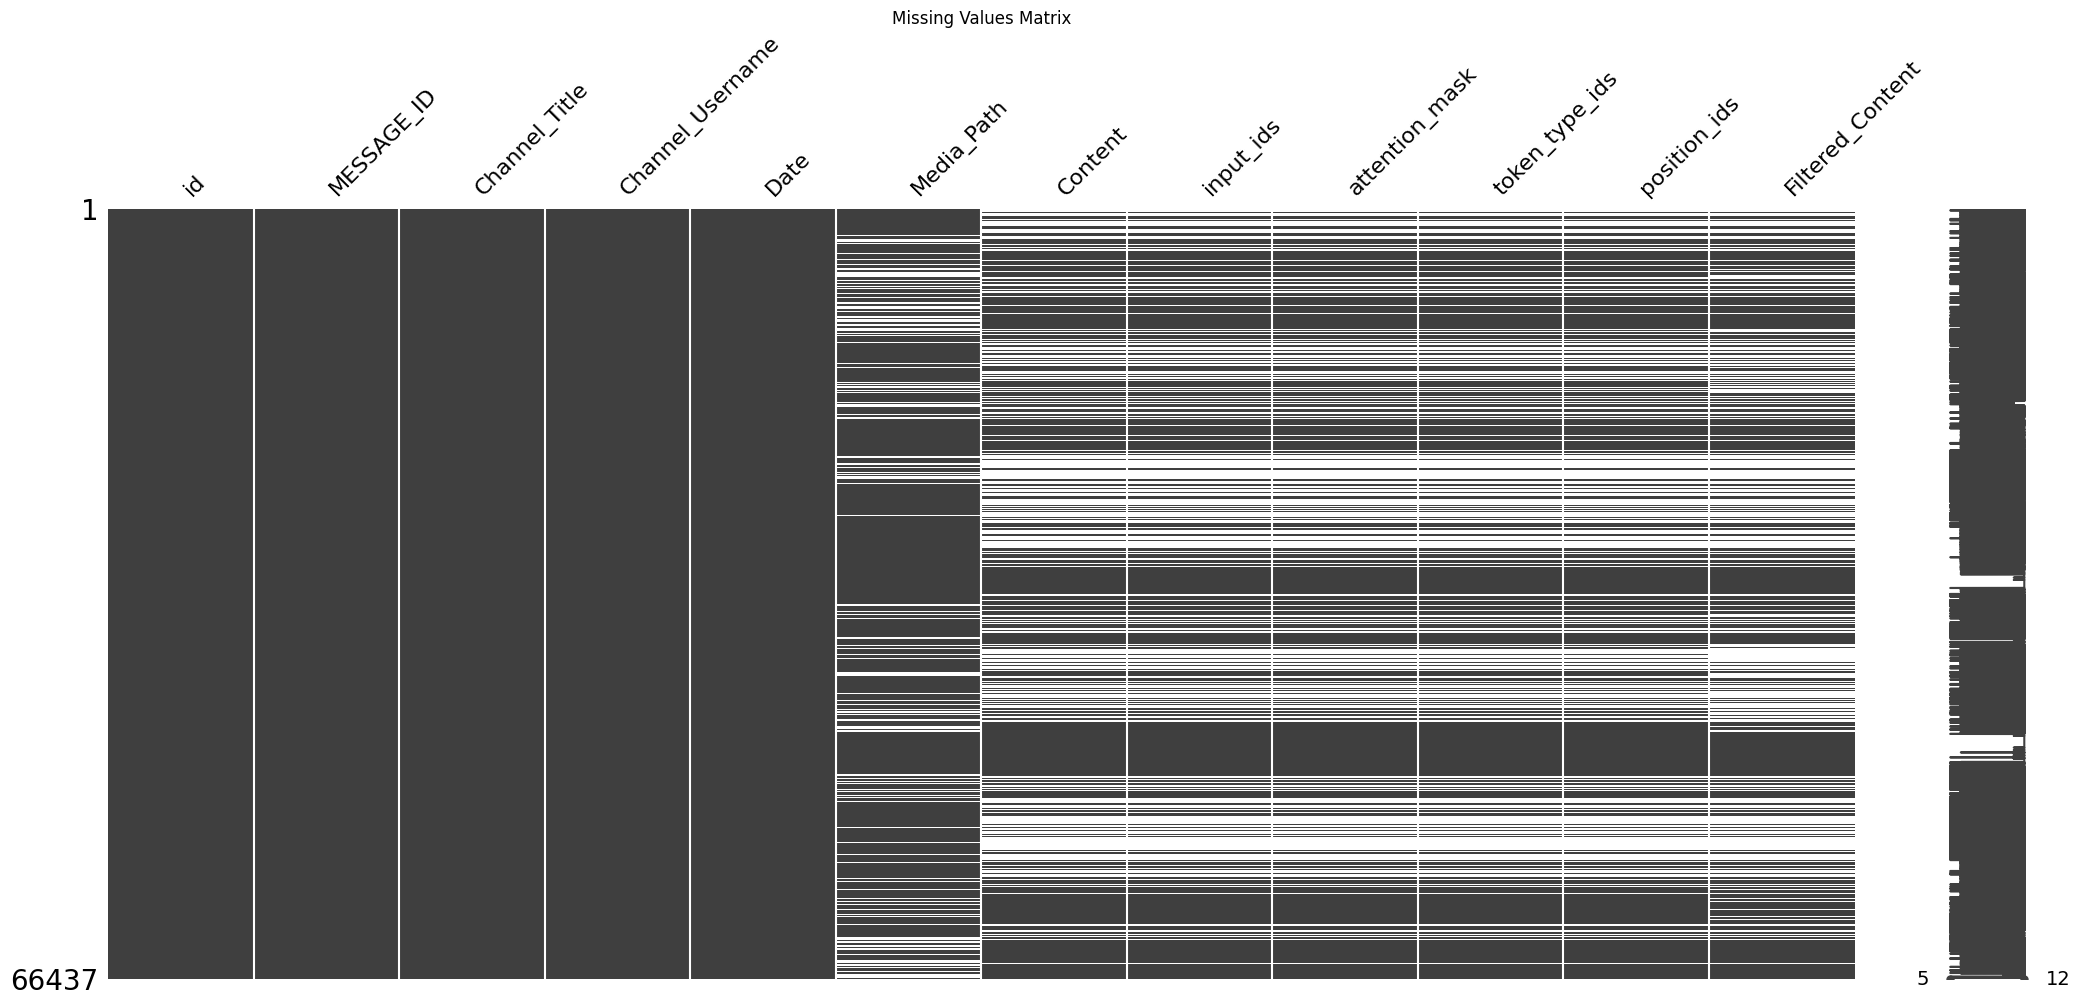

In [ ]:
# Visualize missing values
plot.Visualize_missing_values(df)

### Check summary statistics

In [ ]:
# Summary statistics
print("\n--- Summary Statistics Object Datatypes---")
df.describe(include='object').T


--- Summary Statistics Object Datatypes---


,count,unique,top,freq
Channel_Title,66437,15,AwasMart-አዋስማርት🎁,7718
Channel_Username,66437,15,@AwasMart,7718
Media_Path,54322,54322,qnashcom_photos/@qnashcom_18.jpg,1
Content,42045,27863,Sold out,262
input_ids,42045,9606,"[[101, 102]]",5036
attention_mask,42045,184,"[[1, 1]]",5036
token_type_ids,42045,184,"[[0, 0]]",5036
position_ids,42045,184,"[0, 1]",5036
Filtered_Content,38561,21933,ይሄንን ተጭነው ያድርጉ፣ ቤተሰብ ይሁኑ,151


In [ ]:
# Summary statistics
print("\n--- Summary Statistics Number Datatypes---")
df.describe().T


--- Summary Statistics Number Datatypes---


,count,mean,min,25%,50%,75%,max,std
id,66437.0,33219.0,1.0,16610.0,33219.0,49828.0,66437.0,19178.854254
MESSAGE_ID,66437.0,4494.343935,1.0,2086.0,3870.0,6086.0,15318.0,3215.283784
Date,66437,2023-02-02 11:42:14.656908032,2017-11-30 19:27:07,2022-04-04 05:39:35,2023-06-20 07:30:49,2024-04-13 09:27:43,2025-01-16 12:07:30,NaN


## ===== Data Cleaning =====

### Handle Missing Values

In [ ]:
# ===== Data Cleaning =====
# Handle missing values
df_cleaned = preprocess.handlling_missing_values(df)
df_cleaned.isna().sum()


--- Handling Missing Values ---


id                      0
MESSAGE_ID              0
Channel_Title           0
Channel_Username        0
Date                    0
Media_Path              0
Content                 0
input_ids               0
attention_mask          0
token_type_ids          0
position_ids            0
Filtered_Content    27876
dtype: int64

### Handle duplicate data

In [ ]:
# Handle duplicate data
df_cleaned = preprocess.check_and_handlling_duplicate_values(df_cleaned)


--- Checking Duplicates ---
Number of duplicate rows: 0


### Check datetime Range

In [ ]:
# Basic datetime analysis
print("\n--- Date Analysis ---")
print(f"Date range: {df_cleaned['Date'].min()} to {df_cleaned['Date'].max()}")


--- Date Analysis ---
Date range: 2017-11-30 19:27:07 to 2025-01-16 12:07:30


### Message count per username

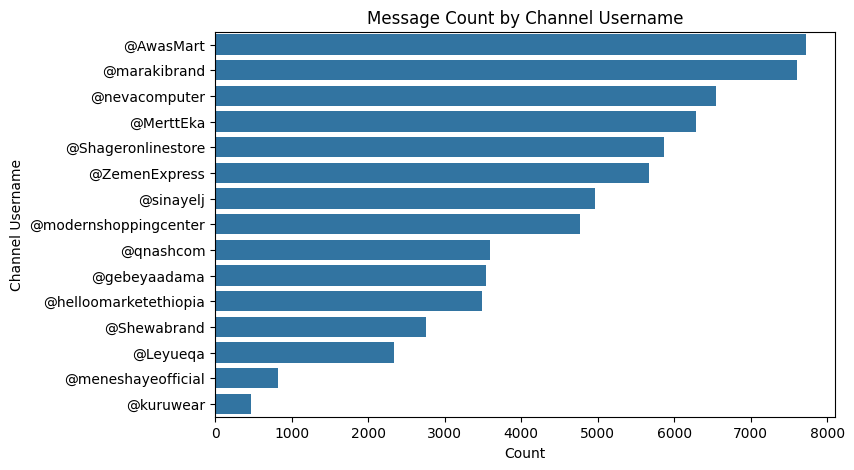

In [ ]:
# ===== Visualization =====
# Message count per username
plot.message_count_per_username(df_cleaned)

### Messages over time (trend)

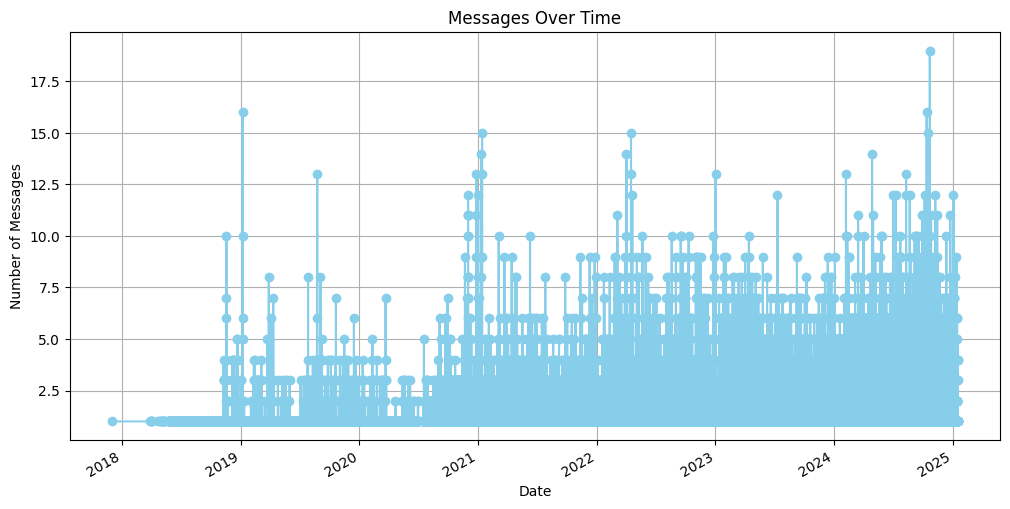

In [ ]:
# Messages over time (trend)
plot.messages_over_time_trend(df_cleaned)

### Distribution of Message IDs

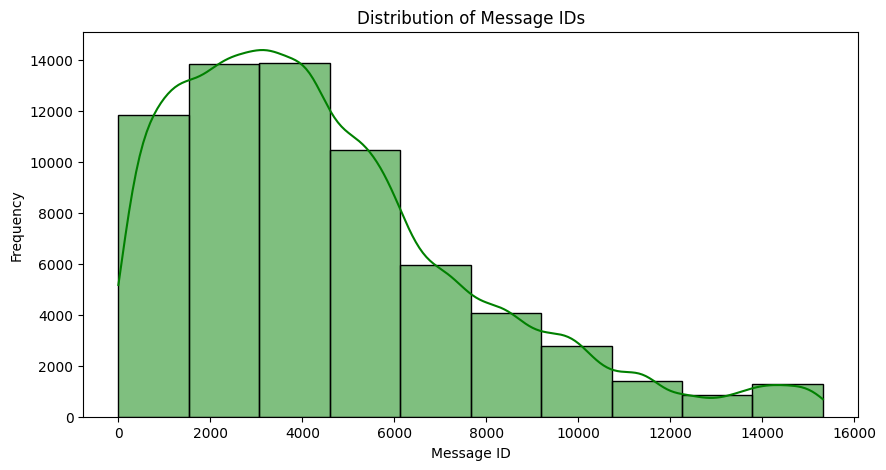

In [ ]:
# Distribution of Message IDs
plot.Distribution_of_Message_IDs(df_cleaned)

In [ ]:
# plot.Distribution_of_Content(df_cleaned)

### Word count in 'Content'

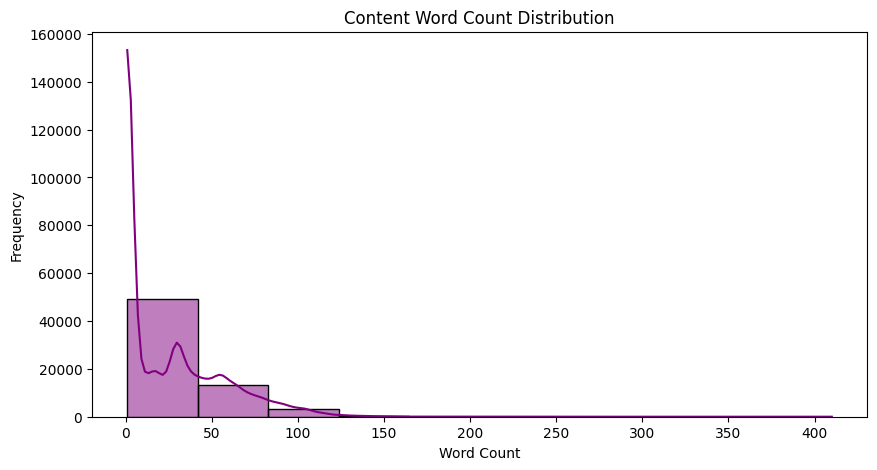

In [ ]:
#  Word count in 'Content' (if available)
plot.word_count_in_content(df_cleaned)

In [ ]:
# # ===== Save Cleaned Data =====
# cleaned_data_path = "cleaned_telegram_data.csv"
# df_cleaned.to_csv(cleaned_data_path, index=False)
# print(f"\nCleaned data saved to: {cleaned_data_path}")

In [ ]:
labeled_data.head()

,Token,Label
0,3pcs,B-PRODUCT
1,silicon,I-PRODUCT
2,brush,I-PRODUCT
3,spatulas,I-PRODUCT
4,እስከ,O


### Task 2
#### CoNLLLabeler

In [ ]:
# Initialize the CoNLLLabeler
labeler = CoNLLLabeler(dataset=df_cleaned, labeled_data=labeled_data)

### Process 30 messages

In [ ]:
# Process 30 messages (or as many as are available)
labeled_messages = labeler.process_messages(num_messages=30)

### Save the labeled messages in CoNLL format

In [ ]:
# Save the labeled messages in CoNLL format
output_path = "labeled_data.conll"
labeler.save_conll_format(labeled_messages, output_path)


print(f"Labeled data saved in CoNLL format to {output_path}")

Labeled data saved in CoNLL format to labeled_data.conll


In [3]:
fine_tuner = NERFineTuner("xlm-roberta-base")
tokenized_datasets = fine_tuner.prepare_data("labeled_data.conll")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/23 [00:00<?, ? examples/s]

Map:   0%|          | 0/6 [00:00<?, ? examples/s]

In [12]:
fine_tuner = NERFineTuner("xlm-roberta-base")
tokenized_datasets = fine_tuner.prepare_data("labeled_data.conll")

Map:   0%|          | 0/23 [00:00<?, ? examples/s]

Map:   0%|          | 0/6 [00:00<?, ? examples/s]

Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# tokenized_datasets

In [15]:
fine_tuner.train(tokenized_datasets, "./ner_model")


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/content/fine_tune_ner_model.py:375: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Precision,Recall,F1
1,0.992400,0.669698,0.727372,0.852861,0.785134
2,0.667400,0.510005,0.727372,0.852861,0.785134
3,0.580800,0.465088,0.727372,0.852861,0.785134


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **Task 4**

In [15]:
model_names = ["xlm-roberta-base",
              #  "distilbert-base-uncased",
               "bert-base-multilingual-cased"]


In [16]:
tokenizer_names = ["xlm-roberta-base",
                  #  "distilbert-base-uncased",
                   "bert-base-multilingual-cased"]


In [17]:
comparison = NERModelComparison(model_names, tokenizer_names, "labeled_data.conll")


In [18]:
comparison.compare_models()


Map:   0%|          | 0/23 [00:00<?, ? examples/s]

Map:   0%|          | 0/6 [00:00<?, ? examples/s]

Training and evaluating xlm-roberta-base...


Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1
1,1.846200,1.568075,0.003274,0.057221,0.006194
2,1.434300,1.128751,0.789625,0.732970,0.746352
3,1.094500,0.762256,0.727372,0.852861,0.785134
4,0.853400,0.595623,0.727372,0.852861,0.785134


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


xlm-roberta-base Evaluation Results: {'eval_loss': 0.5956229567527771, 'eval_precision': 0.7273719457416715, 'eval_recall': 0.8528610354223434, 'eval_f1': 0.7851338355505689, 'eval_runtime': 2.4095, 'eval_samples_per_second': 2.49, 'eval_steps_per_second': 0.415, 'epoch': 4.0}
xlm-roberta-base Training Time: 377.2333891391754 seconds
Training and evaluating bert-base-multilingual-cased...


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/content/Model_comparision.py:168: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


IndexError: index out of range in self

# **Task 5**

In [19]:
ner_interpreter_lime = NERModelInterpretabilityWithLIME(model_names=['xlm-roberta-base'], tokenizer_names=['xlm-roberta-base'], dataset_path="labeled_data.conll")


NameError: name 'NERModelInterpretabilityWithLIME' is not defined

In [ ]:
lime_explanation = ner_interpreter_lime.explain_with_lime(model_name='bert-base-cased', tokenizer_name='bert-base-cased', tokenized_datasets=tokenized_datasets)
